<a href="https://colab.research.google.com/github/tiiagoo321/mentoria_github/blob/main/Revis%C3%A3o%20com%20estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#REVISÃO ESTATISTICA

In [ ]:
import numpy as np
import pandas as pd #SE USA MUITO NO LUGAR PANDAS O SPARK DATAFRAME USANDO O PYSPARK
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from scipy import stats
from sklearn import metrics
import patsy as pt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [ ]:
url = 'https://github.com/qymera0/dncPython/blob/main/estatAvan/diamonds.csv?raw=true'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.shape

(53940, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


##1. Qual é a média da variável 'carat' ?

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


###A média da variável carat é 0.797940

##2. Qual é a correlação entre as variáveis 'price' e 'deph'?

In [ ]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


###A correlação entre price e depth é -0.010647

###3. Após o escalonamento das variáveis numéricas, qual é o valor máximo da variável ‘table’?



In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
dfNum = df.select_dtypes(include='number').drop('price',axis=1)

In [ ]:
dfNum.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [ ]:
# Fazer escalonamento usando um função custom

def feat_scale(X):
  #Cacular média de todas as features
  m = np.mean(X, axis=0)

  #Calcular o desvio padrão de todas as variáveis
  sigma = np.std(X, axis=0)

  #Fazer o escalommento de uma variável
  xNorm = (X-m)/sigma

  return xNorm

In [ ]:
dfNum = feat_scale(dfNum)

In [ ]:
dfNum.head()

,carat,depth,table,x,y,z
0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
1,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
2,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
3,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720
4,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674


In [ ]:
dfNum.describe()

,carat,depth,table,x,y,z
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,2.444878e-16,-3.996902e-15,9.695207e-17,2.782103e-16,-8.430615e-17,-2.002271e-16
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.261458e+00,-1.308760e+01,-6.470073e+00,-5.109120e+00,-5.020931e+00,-5.014556e+00
25%,-8.395232e-01,-5.231053e-01,-6.521385e-01,-9.103248e-01,-8.882800e-01,-8.909461e-01
50%,-2.066210e-01,3.531678e-02,-2.046051e-01,-2.777553e-02,-2.147398e-02,-1.237618e-02
75%,5.106683e-01,5.239361e-01,6.904618e-01,7.210542e-01,7.052421e-01,7.103184e-01
max,8.886075e+00,1.204139e+01,1.680167e+01,4.465203e+00,4.654965e+01,4.004758e+01


### Valor máximo de Table é 16.80

In [ ]:
dfNum2 = df.select_dtypes(include='number').drop('price',axis=1)

In [ ]:
scaler = StandardScaler()
scaler.fit(dfNum2)

StandardScaler()

In [ ]:
dfScaled = scaler.transform(dfNum2)

In [ ]:
dfScaled = pd.DataFrame(dfScaled, columns=dfNum2.columns)

In [ ]:
dfScaled.head()

,carat,depth,table,x,y,z
0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
1,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
2,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
3,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720
4,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674


In [ ]:
dfScaled.describe()

,carat,depth,table,x,y,z
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,2.444878e-16,-3.996902e-15,9.695207e-17,2.782103e-16,-8.430615e-17,-2.002271e-16
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.261458e+00,-1.308760e+01,-6.470073e+00,-5.109120e+00,-5.020931e+00,-5.014556e+00
25%,-8.395232e-01,-5.231053e-01,-6.521385e-01,-9.103248e-01,-8.882800e-01,-8.909461e-01
50%,-2.066210e-01,3.531678e-02,-2.046051e-01,-2.777553e-02,-2.147398e-02,-1.237618e-02
75%,5.106683e-01,5.239361e-01,6.904618e-01,7.210542e-01,7.052421e-01,7.103184e-01
max,8.886075e+00,1.204139e+01,1.680167e+01,4.465203e+00,4.654965e+01,4.004758e+01


##4. Após a ‘dummyficação’ das variáveis categóricas, quantas colunas existem em um dataset com somente variáveis desse tipo?

In [ ]:
dfCat = df.loc[:, ~df.columns.isin(dfNum.columns)].drop('price', axis=1)

In [ ]:
dfCat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [ ]:
dfCat['color'].unique

<bound method Series.unique of 0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: object>

In [ ]:
dfCat = dfCat.astype('category')

In [ ]:
dfCat = pd.get_dummies(dfCat, drop_first= True)

In [ ]:
dfCat.shape

(53940, 20)

In [ ]:
dfCat.columns

Index(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

### Temos 17 variáveis categoricas

###5. A distribuição da resposta ‘price’ é normal e não precisa ser transformada.

In [ ]:
dfPrice = pd.DataFrame(df['price'])

In [ ]:
type(dfPrice)

pandas.core.frame.DataFrame

Text(0, 0.5, 'Frequencia')

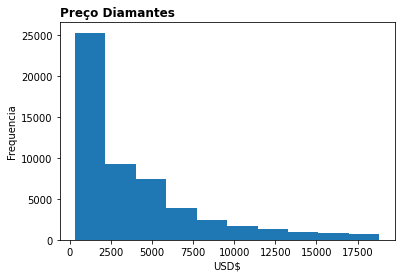

In [ ]:
#HIST

fig = plt.figure()

plt.hist(df['price'])

plt.title('Preço Diamantes', loc = 'left', fontweight='bold')

plt.xlabel('USD$')

plt.ylabel('Frequencia')

In [ ]:
kStat, kPvalue = stats.kstest(df['price'], cdf= 'norm')

In [ ]:
print('Teste estatistico de Normalidade:', kStat, 'p-value:', kPvalue )

Teste estatistico de Normalidade: 1.0 p-value: 0.0


### A resposta price não é normal

##6. Ao separar o dataset em dois pedaços, o de treinamento e o de teste, quantas linhas possuirá o dataset de teste? (Utilize uma proporção de 20% e argumento random_state = 123456) Dica: concatene os datasets e faça a matriz do modelo antes de fazer a separação entre treinamento e teste.

In [ ]:
dfFull = pd.concat([dfNum, dfCat,df['price']],axis=1)

In [ ]:
dfFull.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,0,1,0,0,...,0,0,0,0,1,0,0,0,0,326
1,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,0,0,1,0,...,0,0,0,1,0,0,0,0,0,326
2,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,1,0,0,0,...,0,0,0,0,0,1,0,0,0,327
3,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720,0,0,1,0,...,1,0,0,0,0,0,1,0,0,334
4,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674,1,0,0,0,...,0,1,0,0,1,0,0,0,0,335


In [ ]:
def ols_formula(df, depentent_var, *excluded_rows):
  #Lista colunas do Dataframe
  dfCols = list(df.columns.values)

  #Remover variável dependente
  dfCols.remove(depentent_var)

  #Rmover as váriaveis excluídas
  for col in excluded_rows:
    dfCols.remove(col)

  #Retornar a formula
  return depentent_var + ' ~ ' + ' + '.join(dfCols)

In [ ]:
ols_formula(dfFull, 'price')

'price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [ ]:
dfFull = dfFull.rename(columns={'cut_Very Good': 'cut_VeryGood' })

In [ ]:
y, X = pt.dmatrices(ols_formula(dfFull, 'price'), data=dfFull, return_type='dataframe')

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=123456)

In [ ]:
xTrain.reset_index(drop=True, inplace=True)
xTest.reset_index(drop=True, inplace=True)
yTrain.reset_index(drop=True, inplace=True)
yTest.reset_index(drop=True, inplace=True)

In [ ]:
xTest.shape

(10788, 24)

### Qnt de linhas do Dataset de text é 10788 

###7. Utilizando o método dos mínimos quadrados e ajustando o modelo com o logaritmo natural da resposta ‘price’ e os dados de ajuste, qual é a variável que tem o maior valor para a estatística ‘t’. (OBS: desconsidere o ‘intercept’).


In [ ]:
#Ajuste modelo
regl = sm.OLS(np.log(yTrain), xTrain)
reglfit = regl.fit()

In [ ]:
print(reglfit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 5.655e+04
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:44:58   Log-Likelihood:                 12290.
No. Observations:               43152   AIC:                        -2.453e+04
Df Residuals:                   43128   BIC:                        -2.432e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.1184      0.009    782.126   

### A variável com maior valor estatístico 't' é o x com 205.705

##8. Para o modelo ajustado na questão 07, qual é a variável que possui o maior VIF?

In [ ]:
pd.DataFrame({'Variaveis': xTrain.columns[1:],
              'VIF': [variance_inflation_factor(xTrain.values, i+1) for i in range(len(xTrain.columns[1:]))]
              })

,Variaveis,VIF
0,carat,21.714137
1,depth,1.712892
2,table,1.783268
3,x,50.908609
4,y,16.921473
5,z,20.059420
6,cut_Good,3.943117
7,cut_Ideal,11.397405
8,cut_Premium,8.408910
9,cut_VeryGood,7.698138


### A variável com maior VIF é x com valor 50.908609

##9. Após remover todas as variáveis para manter os VIF´s em no máximo 5, quantas variáveis sobraram no modelo? OBS: desconsidere o intercept. (Dica, comece removendo, uma por uma, as variáveis com maior VIF)

In [ ]:
var = ['x', 'clarity_SI1', 'z', 'cut_Ideal', 'carat']

In [ ]:
pd.DataFrame({'Variaveis': xTrain.drop(var, axis=1).columns[1:],
              'VIF': [variance_inflation_factor(xTrain.drop(var, axis=1).values, i+1) for i in range(len(xTrain.drop(var, axis=1).columns[1:]))]
              })

,Variaveis,VIF
0,depth,1.172445
1,table,1.535214
2,y,1.282658
3,cut_Good,1.310436
4,cut_Premium,1.553306
5,cut_VeryGood,1.348768
6,color_E,2.002190
7,color_F,2.004205
8,color_G,2.188579
9,color_H,1.944377


### Sobraram 18 variáveis

##10. Qual é o R^2 para os dados de teste com o modelo sem as variáveis removidas na questão 9?

In [ ]:
#Ajuste modelo
regl2 = sm.OLS(np.log(yTrain), xTrain.drop(var, axis=1))
reglfit2 = regl2.fit()

In [ ]:
print(reglfit2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 2.069e+04
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:27:45   Log-Likelihood:                -13037.
No. Observations:               43152   AIC:                         2.611e+04
Df Residuals:                   43133   BIC:                         2.628e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.8353      0.006   1408.633   

In [ ]:
lnYPRED = pd.concat([np.log(yTest), reglfit2.predict(xTest.drop(var, axis=1))], axis=1)
lnYPRED.columns = ['price', 'pricePred']

In [ ]:
lnYPRED.head()

,price,pricePred
0,7.989560,7.920652
1,9.259035,9.380046
2,7.064759,7.205302
3,9.287024,8.737650
4,7.111512,7.270200


In [ ]:
print('Rˆ2 de test:',metrics.r2_score(lnYPRED['price'],lnYPRED['pricePred']))

Rˆ2 de test: 0.9602537286233842


##11. Utilizando os dados de teste, faça a análise de resíduos e responda: eles estão de acordo com a hipótese para a regressão linear?

In [ ]:
lnYPRED['res'] = lnYPRED['price'] - lnYPRED['pricePred']

(array([5.000e+00, 1.900e+01, 7.200e+01, 2.598e+03, 7.178e+03, 9.040e+02,
        9.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([-1.6095003 , -1.23895774, -0.86841517, -0.4978726 , -0.12733003,
         0.24321253,  0.6137551 ,  0.98429767,  1.35484023,  1.7253828 ,
         2.09592537]),
 <a list of 10 Patch objects>)

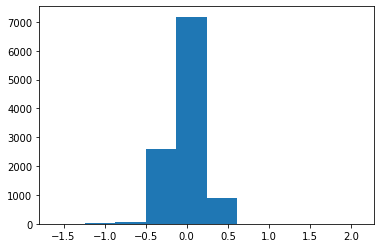

In [ ]:
fig = plt.figure()

plt.hist(lnYPRED['res'])

In [ ]:
kStat, kPvalue = stats.kstest(lnYPRED['res'], cdf= 'norm')

In [ ]:
print('Teste estatistico de Normalidade:', kStat, 'p-value:', kPvalue )

Teste estatistico de Normalidade: 0.3413700175348058 p-value: 0.0


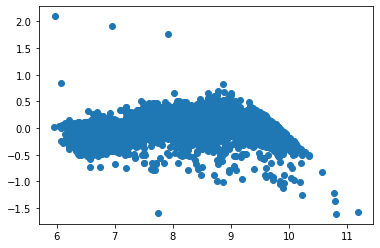

In [ ]:
fig = plt.figure()

plt.scatter(lnYPRED['pricePred'],lnYPRED['res'])

##12. Utilizando a regressão regularizada tipo “ridge” e o dataset com TODOS os regressores, qual dentre os seguintes valores de alpha deixa o modelo com o maior R^2 para os dados de teste?*texto em itálico*

In [ ]:
regRidge = Ridge(alpha=20)

In [ ]:
regRidge.fit(xTrain.drop(['Intercept'], axis=1), yTrain)

Ridge(alpha=20)

In [ ]:
regRidgePredict = regRidge.predict(xTest.drop(['Intercept'], axis = 1))

In [ ]:
predYRidge = pd.concat([yTest,pd.DataFrame(regRidgePredict)],axis=1)
predYRidge.columns = ['price', 'pricePredRidge']

In [ ]:
print('Rquadrado', metrics.r2_score(predYRidge['price'], predYRidge['pricePredRidge']))

Rquadrado 0.9229393373904309


In [ ]:
alpha = [10, 11, 12, 13, 14, 15]

In [ ]:
for a in alpha:
  regRidge = Ridge(alpha=a)
  regRidge.fit(xTrain.drop(['Intercept'], axis=1), yTrain)
  regRidgePredict = regRidge.predict(xTest.drop(['Intercept'], axis = 1))
  predYRidge = pd.concat([yTest,pd.DataFrame(regRidgePredict)],axis=1)
  predYRidge.columns = ['price', 'pricePredRidge']
  print('Rquadrado:', metrics.r2_score(predYRidge['price'], predYRidge['pricePredRidge']))


Rquadrado: 0.923381800699866
Rquadrado: 0.923346378385685
Rquadrado: 0.9233085882545432
Rquadrado: 0.9232686014704219
Rquadrado: 0.9232265776389111
Rquadrado: 0.9231826656516243


### Rˆ2 é maior no alpha de 10